#  Uncovering the Drivers of Insurance Costs: A Data-Driven Analysis          Context: 




In this project, we will use a large insurance dataset to identify the key drivers of insurance costs. We will begin by performing descriptive analyses of the data, including examining the distribution of charges and identifying any potential outliers. Next, we will use techniques such as correlation analysis and regression modeling to identify which factors are most strongly associated with charges, and develop predictive models to estimate charges for new patients.

In [1]:
#importing librarys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_context('poster',font_scale=0.5)

In [2]:
insurance = pd.read_csv('insurance.csv')  #importing dataset
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [4]:
insurance.duplicated().sum()

1

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#insurance[['smoker_code','region_code','sex_code']]=insurance[['smoker','region','sex']].astype('category').cat.codes
#insurance[['smoker_code','region_code','sex_code']]=pd.Categorical(insurance[['smoker','region','sex']]).codes

In [7]:
insurance['sex_code'] = insurance['sex'].astype('category').cat.codes
insurance['smoker_code'] = insurance['smoker'].astype('category').cat.codes
insurance['region_code'] = insurance['region'].astype('category').cat.codes

#the above columns are coded with numbers  as 

#smoker (0) - yes,(1)-no  , 

#sex (0)- female ,(1)-male ,

#region (0)-northeast,(1)-northwest,(2)-southeast,(3)-southwest

In [8]:
insurance = insurance.reindex(columns=['sex','smoker','region','bmi','children','age','charges','smoker_code','region_code','sex_code'])
# rearrenging columns

In [9]:
insurance

,sex,smoker,region,bmi,children,age,charges,smoker_code,region_code,sex_code
0,female,yes,southwest,27.900,0,19,16884.92400,1,3,0
1,male,no,southeast,33.770,1,18,1725.55230,0,2,1
2,male,no,southeast,33.000,3,28,4449.46200,0,2,1
3,male,no,northwest,22.705,0,33,21984.47061,0,1,1
4,male,no,northwest,28.880,0,32,3866.85520,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1333,male,no,northwest,30.970,3,50,10600.54830,0,1,1
1334,female,no,northeast,31.920,0,18,2205.98080,0,0,0
1335,female,no,southeast,36.850,0,18,1629.83350,0,2,0
1336,female,no,southwest,25.800,0,21,2007.94500,0,3,0


In [10]:
insurance.nunique()

sex               2
smoker            2
region            4
bmi             548
children          6
age              47
charges        1337
smoker_code       2
region_code       4
sex_code          2
dtype: int64

In [11]:
insurance.describe()

,bmi,children,age,charges,smoker_code,region_code,sex_code
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,30.663397,1.094918,39.207025,13270.422265,0.204783,1.515695,0.505232
std,6.098187,1.205493,14.049960,12110.011237,0.403694,1.104885,0.500160
min,15.960000,0.000000,18.000000,1121.873900,0.000000,0.000000,0.000000
25%,26.296250,0.000000,27.000000,4740.287150,0.000000,1.000000,0.000000
50%,30.400000,1.000000,39.000000,9382.033000,0.000000,2.000000,1.000000
75%,34.693750,2.000000,51.000000,16639.912515,0.000000,2.000000,1.000000
max,53.130000,5.000000,64.000000,63770.428010,1.000000,3.000000,1.000000


<AxesSubplot:>

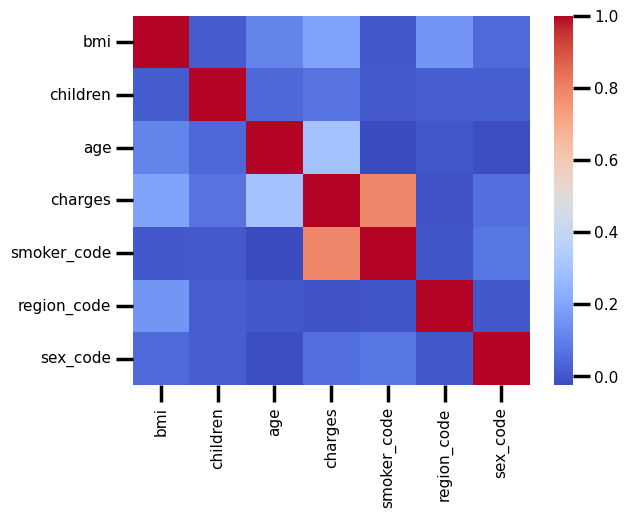

In [15]:
sns.heatmap(insurance.corr(),cmap='coolwarm')

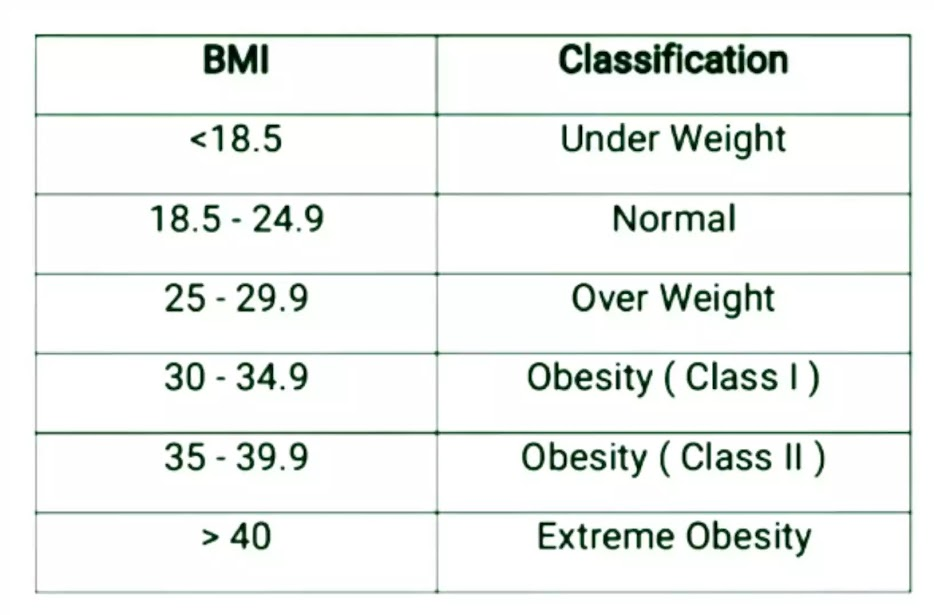

In [16]:
insurance['bmi_code']=pd.cut(insurance['bmi'],bins=[0,18.5,25,30,35,40,54],labels=['uder_weight','normal','over_weight','obesity(c1)','obesity(c2)','extre_obesity'])

In [17]:
insurance['age']=insurance['age'].astype(int)

In [18]:
insurance

,sex,smoker,region,bmi,children,age,charges,smoker_code,region_code,sex_code,bmi_code
0,female,yes,southwest,27.900,0,19,16884.92400,1,3,0,over_weight
1,male,no,southeast,33.770,1,18,1725.55230,0,2,1,obesity(c1)
2,male,no,southeast,33.000,3,28,4449.46200,0,2,1,obesity(c1)
3,male,no,northwest,22.705,0,33,21984.47061,0,1,1,normal
4,male,no,northwest,28.880,0,32,3866.85520,0,1,1,over_weight
...,...,...,...,...,...,...,...,...,...,...,...
1333,male,no,northwest,30.970,3,50,10600.54830,0,1,1,obesity(c1)
1334,female,no,northeast,31.920,0,18,2205.98080,0,0,0,obesity(c1)
1335,female,no,southeast,36.850,0,18,1629.83350,0,2,0,obesity(c2)
1336,female,no,southwest,25.800,0,21,2007.94500,0,3,0,over_weight


([<matplotlib.patches.Wedge at 0x1d8af4c69a0>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'female'),
  Text(0.018242919624250845, -1.1098500781112661, 'male')],
 [Text(-0.009861037634729992, 0.5999189611412249, '50.52%'),
  Text(0.010025388261975687, -0.6099176104935785, '49.48%')])

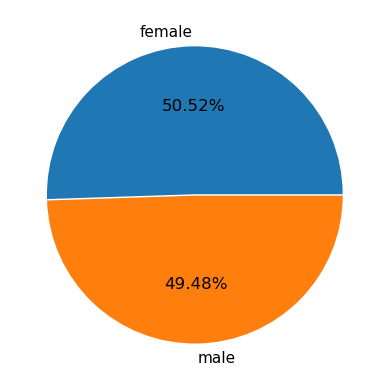

In [19]:
plt.pie(x=insurance.sex.value_counts(),autopct='%0.2f%%',explode=[0,0.01],labels=insurance.sex.unique())

## inferences-

Females make up slightly over half of the individuals in the insurance dataset at 50.52%.
Males comprise the remaining 49.48% of the dataset.
The pie chart visually represents the distribution of sexes in the dataset.

([<matplotlib.patches.Wedge at 0x1d8af62a490>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'yes'),
  Text(0.9601119635212645, -0.7198506911181947, 'no')],
 [Text(-0.48005598176063224, 0.3599253455590972, '79.52%'),
  Text(0.5600653120540708, -0.41991290315228014, '20.48%')])

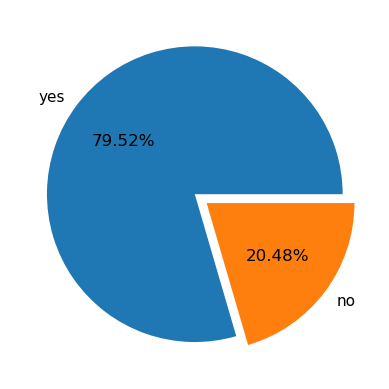

In [20]:
plt.pie(insurance.smoker_code.value_counts(),autopct='%0.2f%%',explode=[0,0.1],labels=insurance.smoker.unique())

## Inferences-

Approximately 79.52% of individuals in the insurance dataset are smokers.
The remaining 20.48% of individuals in the dataset are non-smokers.
The pie chart provides a visual representation of the distribution of smoking status in the dataset.

([<matplotlib.patches.Wedge at 0x1d8af671a60>,
 [Text(0.7877669302421269, 0.9052200084050817, 'southwest'),
  Text(-0.870611510104252, 0.6885750492676846, 'southeast'),
  Text(-0.7267164192160336, -0.8390370945565079, 'northwest'),
  Text(0.803998423041151, -0.765301597899379, 'northeast')],
 [Text(0.4595307093079073, 0.5280450049029644, '27.20%'),
  Text(-0.4784441632104447, 0.3784061081561149, '24.29%'),
  Text(-0.3993666808304328, -0.46109245736889165, '24.29%'),
  Text(0.44183697122081267, -0.42057114839515414, '24.22%')])

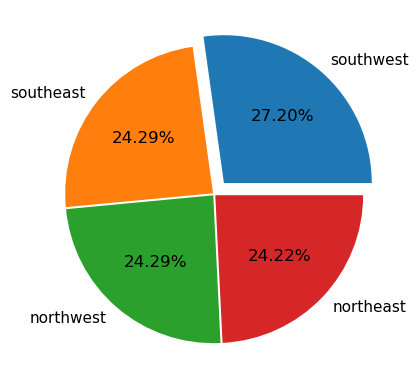

In [21]:
plt.pie(insurance.region_code.value_counts(),autopct='%3.2f%%',explode=[0.1,0.01,0.01,0.01],labels=insurance.region.unique())

## Inferences-

Patients from all four regions are fairly evenly distributed in the insurance dataset.
The Southwest region comprises the largest portion of patients in the dataset at 27%, which is 2% more than the other regions.
The pie chart provides a visual representation of the distribution of patients from different regions in the dataset.

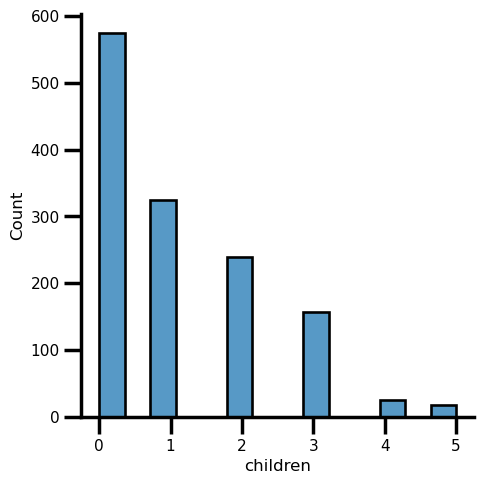

In [22]:
sns.displot(insurance.children)

## Inferences-

The most common number of children among patients in the dataset is 0, with a count of 600.
The second most common number of children is 1, with a count of 300.
The third most common number of children is 2, with a count of 250.
The number of patients with 3 children is 180, while the number of patients with 4 or more children is relatively small (15 and 10 respectively).
The bar plot provides a visual representation of the distribution of the number of children among patients in the dataset.

<AxesSubplot:xlabel='children', ylabel='charges'>

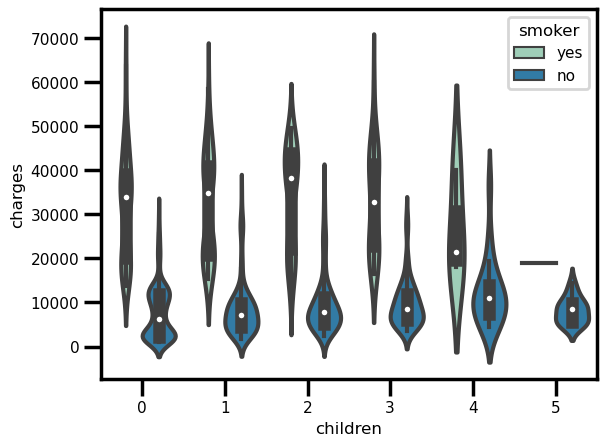

In [23]:
sns.violinplot(data=insurance,x='children',y='charges',hue='smoker',palette='YlGnBu')
#"""supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'"""

## Inferences-


Non-smokers tend to have lower insurance charges than smokers across all numbers of children, with their violin plots mostly falling in the range of 0 to 30000.
Smokers tend to have higher insurance charges than non-smokers across all numbers of children, with their violin plots mostly falling in the range of 20000 to 60000+.
The number of children a patient has does not seem to have a strong impact on the distribution of insurance charges.
The violin plot provides a visual representation of the distribution of insurance charges for patients with different numbers of children, grouped by smoking status.

<AxesSubplot:xlabel='age', ylabel='charges'>

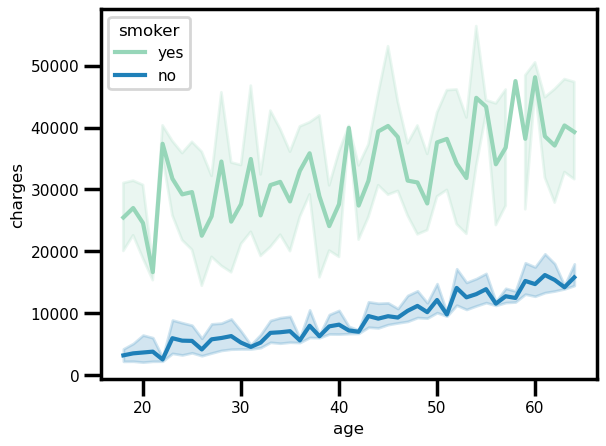

In [24]:
sns.lineplot(data=insurance,x='age',y='charges',hue='smoker',palette='YlGnBu')

## Inferences-


As age increases, insurance charges tend to increase as well, regardless of smoking status.
Non-smokers generally have lower insurance charges than smokers across all ages, with their line mostly falling in the range of 0 to 20000.
Smokers generally have higher insurance charges than non-smokers across all ages, with their line mostly falling in the range of 30000 to 40000+.
The line plot provides a visual representation of the relationship between age and insurance charges, grouped by smoking status.

<AxesSubplot:xlabel='region', ylabel='charges'>

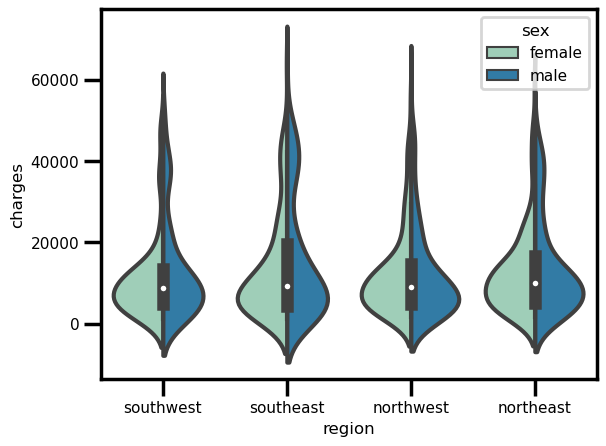

In [25]:
sns.violinplot(data=insurance,x='region',y='charges',hue='sex',split=True,palette='YlGnBu')

## Inferences-


There does not seem to be a significant difference in the distribution of insurance charges among patients from different regions.
The distribution of insurance charges for males and females is also similar across all regions.
The violin plot provides a visual representation of the distribution of insurance charges for patients from different regions, grouped by gender.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

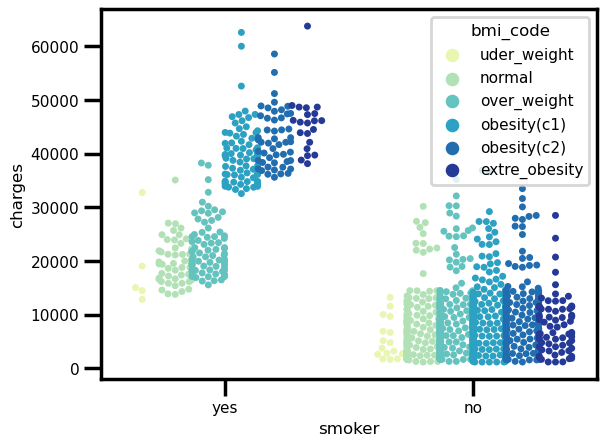

In [26]:
sns.swarmplot(data=insurance,x='smoker',y='charges',hue='bmi_code',split=True,palette='YlGnBu')

## Inferences-


Non-smokers tend to have lower insurance charges than smokers, with their swarm mostly falling in the range of 0 to 30000.
Yes smokers have a wider range of insurance charges compared to non-smokers, with their swarm mostly falling in the range of 20000 to 60000+.
For all BMI categories, there is a consistent pattern of higher insurance charges for yes smokers compared to non-smokers.
The swarm plot provides a visual representation of the relationship between smoking status, insurance charges, and BMI categories.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8b0ac2760>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8b0ac2d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8b0ac2490>,
 'medians': [<matplotlib.lines.Line2D at 0x1d8b0ad62e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d8b0ad65b0>,
 'means': []}

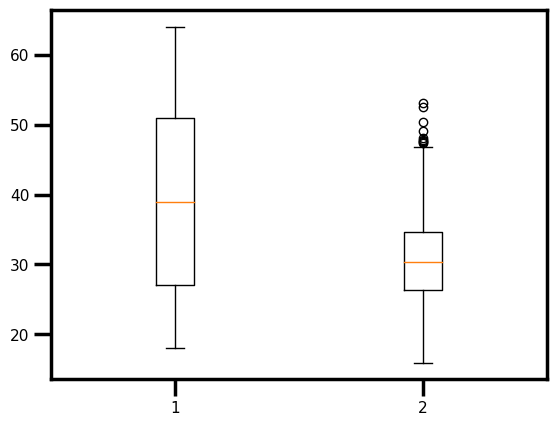

In [27]:
plt.boxplot([insurance['age'],insurance['bmi']])

## Inferences-


The distribution of age in the insurance dataset ranges up to 60 years, with the majority of patients falling between the ages of 18 and 50.
The distribution of BMI in the insurance dataset ranges up to 35, with the majority of patients falling between the BMI range of 20 and 35.
The box plot provides a visual representation of the distribution of age and BMI in the insurance dataset.

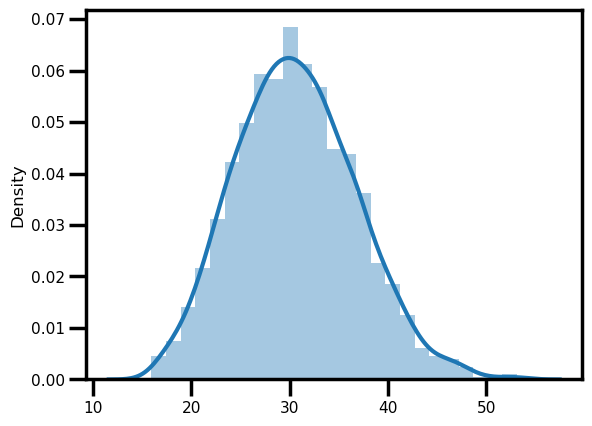

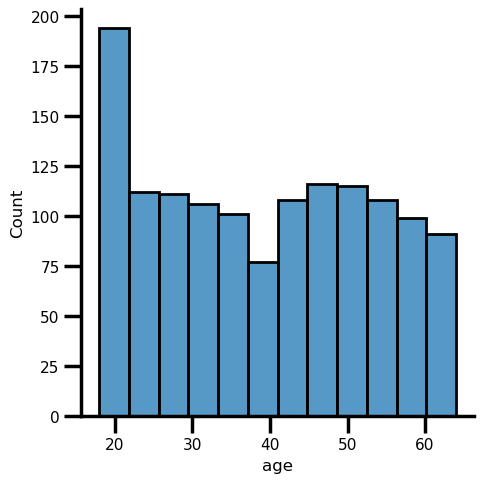

In [28]:
sns.distplot([insurance['bmi']])
             
sns.displot(insurance['age'])

## Inferences-


The distribution plot for BMI shows that the distribution is slightly right-skewed, with a peak around 30.
The histogram for age shows that the majority of patients in the insurance dataset are between the ages of 18 and 25, with a few patients in their 60s.
Both the distribution plot and histogram provide a visual representation of the distribution of BMI and age in the insurance dataset.

In [29]:
print(list(insurance))

['sex', 'smoker', 'region', 'bmi', 'children', 'age', 'charges', 'smoker_code', 'region_code', 'sex_code', 'bmi_code']


In [30]:
insurance=insurance.reindex(columns=[ 'charges','sex', 'smoker', 'region', 'bmi', 'children', 'age', 'smoker_code', 'region_code', 'sex_code', 'bmi_code'])

In [31]:
insurance

,charges,sex,smoker,region,bmi,children,age,smoker_code,region_code,sex_code,bmi_code
0,16884.92400,female,yes,southwest,27.900,0,19,1,3,0,over_weight
1,1725.55230,male,no,southeast,33.770,1,18,0,2,1,obesity(c1)
2,4449.46200,male,no,southeast,33.000,3,28,0,2,1,obesity(c1)
3,21984.47061,male,no,northwest,22.705,0,33,0,1,1,normal
4,3866.85520,male,no,northwest,28.880,0,32,0,1,1,over_weight
...,...,...,...,...,...,...,...,...,...,...,...
1333,10600.54830,male,no,northwest,30.970,3,50,0,1,1,obesity(c1)
1334,2205.98080,female,no,northeast,31.920,0,18,0,0,0,obesity(c1)
1335,1629.83350,female,no,southeast,36.850,0,18,0,2,0,obesity(c2)
1336,2007.94500,female,no,southwest,25.800,0,21,0,3,0,over_weight


In [32]:
columnname=insurance[5:]

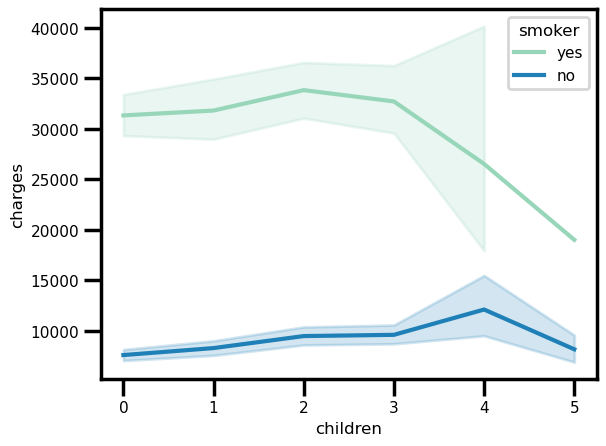

AxesSubplot(0.125,0.11;0.775x0.77)


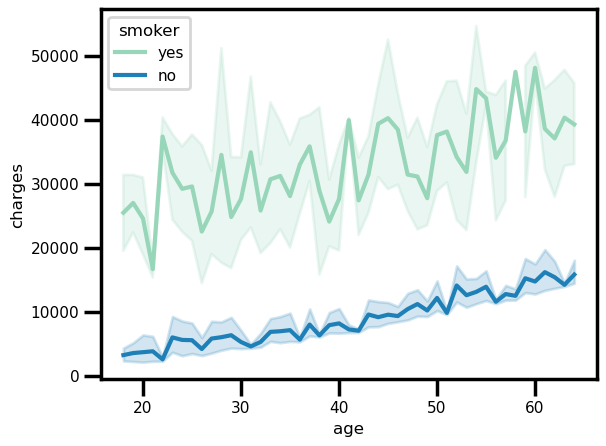

AxesSubplot(0.125,0.11;0.775x0.77)


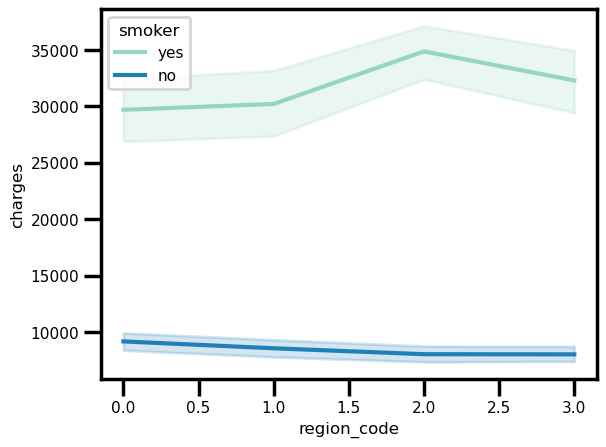

AxesSubplot(0.125,0.11;0.775x0.77)


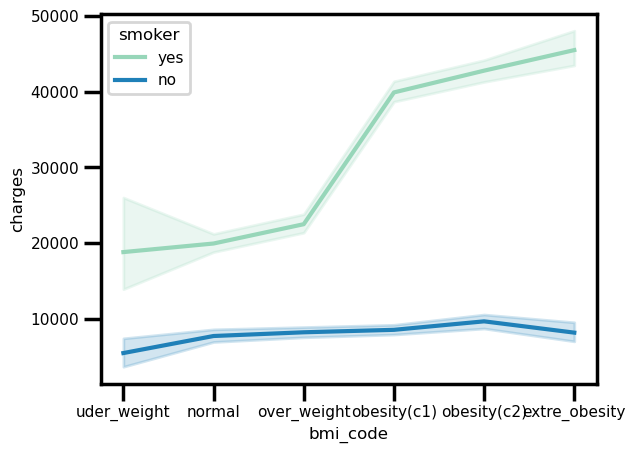

AxesSubplot(0.125,0.11;0.775x0.77)


In [33]:
for col in insurance[['children', 'age', 'region_code', 'bmi_code']]:
    results=sns.lineplot(x=col,y='charges',hue='smoker',data=insurance,palette='YlGnBu')
    plt.show()
    print(results)

## Inferences-


For all features (children, age, region_code, and bmi_code), the line plots show that charges are generally higher for yes smokers compared to no smokers.
The line plots for age and bmi_code show a relatively consistent increase in charges with increasing age and BMI, respectively, for both smoker categories.
The line plots for children and region_code show less consistent relationships with charges, with some variation between different levels of the features and between smoker categories.
Overall, the line plots provide a visual representation of the relationship between different features and charges in the insurance dataset, with an emphasis on the effect of smoker status.

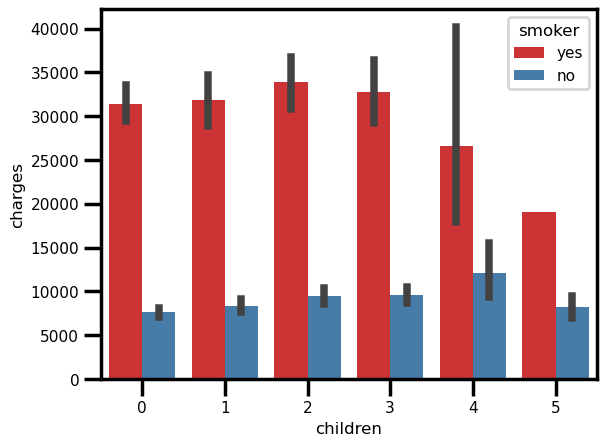

AxesSubplot(0.125,0.11;0.775x0.77)


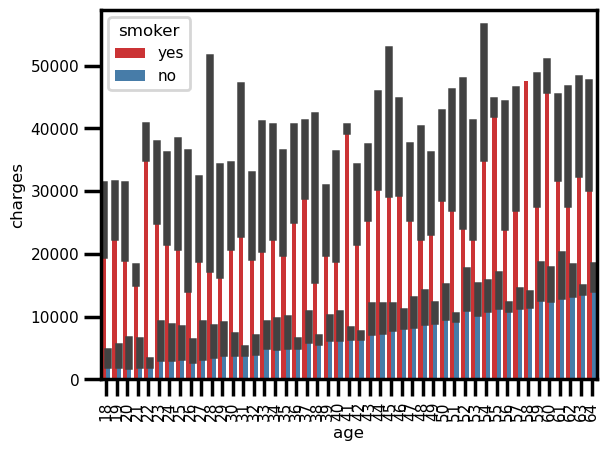

AxesSubplot(0.125,0.11;0.775x0.77)


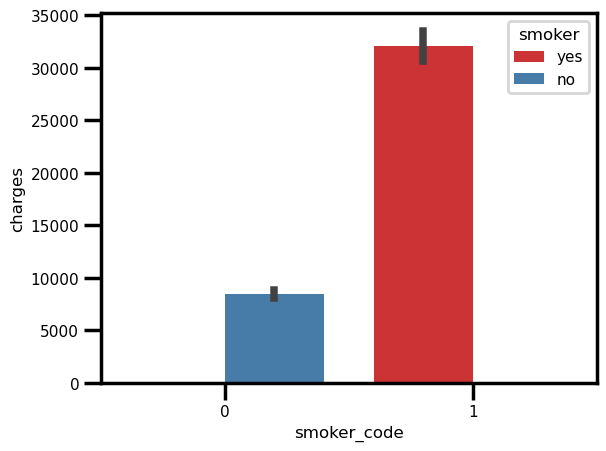

AxesSubplot(0.125,0.11;0.775x0.77)


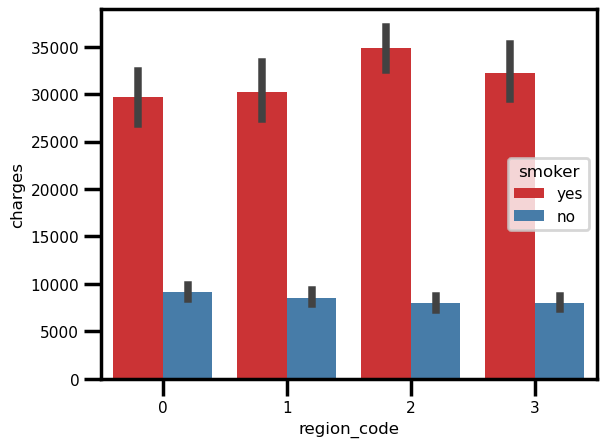

AxesSubplot(0.125,0.11;0.775x0.77)


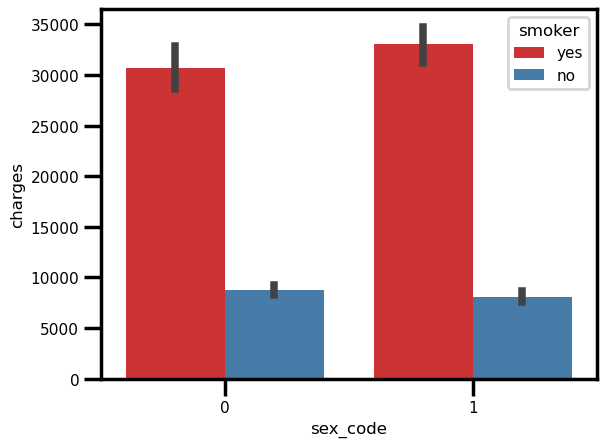

AxesSubplot(0.125,0.11;0.775x0.77)


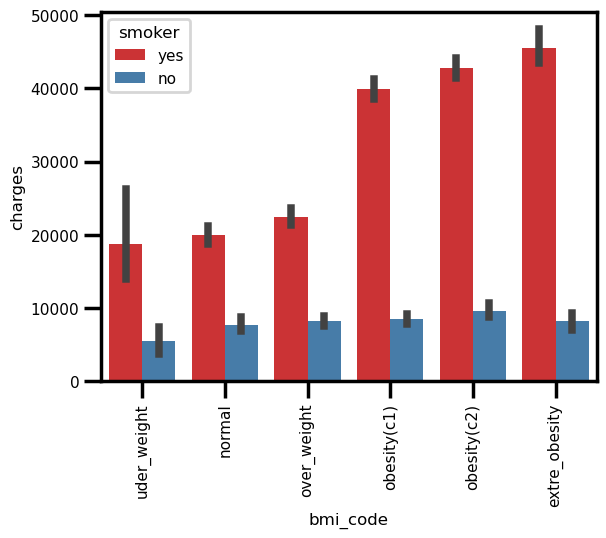

AxesSubplot(0.125,0.11;0.775x0.77)


In [34]:
for col in insurance[['children', 'age', 'smoker_code', 'region_code', 'sex_code', 'bmi_code']]:
    results=sns.barplot(x=col,y='charges',hue='smoker',data=insurance,palette='Set1')
    if col=='bmi_code':
        #for ax in results.axes.flat:
        results.set_xticklabels(results.get_xticklabels(), rotation=90)
    if col=='age':
        #for ax in results.axes.flat:
        results.set_xticklabels(results.get_xticklabels(), rotation=90)
    plt.show()
    print(results)

## Inferences-


The bar plot for 'children' shows that as the number of children increases, the charges also tend to increase slightly. However, the difference between the number of children is  significant.
The bar plot for 'age' shows that charges tend to increase with age, with the highest charges for patients in their 50s and 60s.
The bar plot for 'smoker_code' shows that patients who smoke tend to have significantly higher charges compared to those who don't smoke, regardless of other factors.
The bar plot for 'region_code' shows that there is not much variation in charges across different regions.
The bar plot for 'sex_code' shows that there is not much difference in charges between males and females.
The bar plot for 'bmi_code' shows that patients with higher BMI tend to have slightly higher charges compared to those with lower BMI. However, the difference between BMI categories is not significant. Additionally, patients who smoke tend to have higher charges within each BMI category.

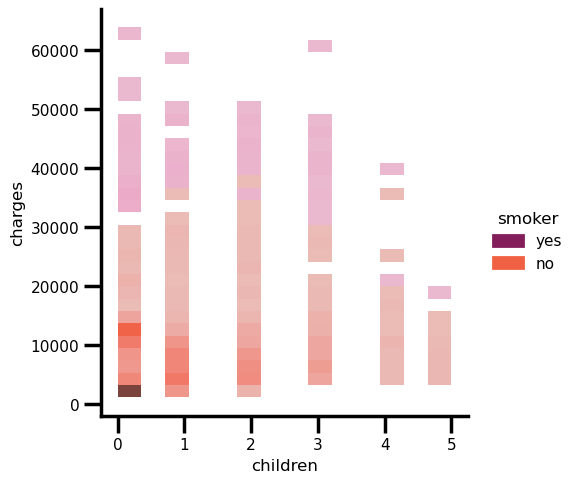

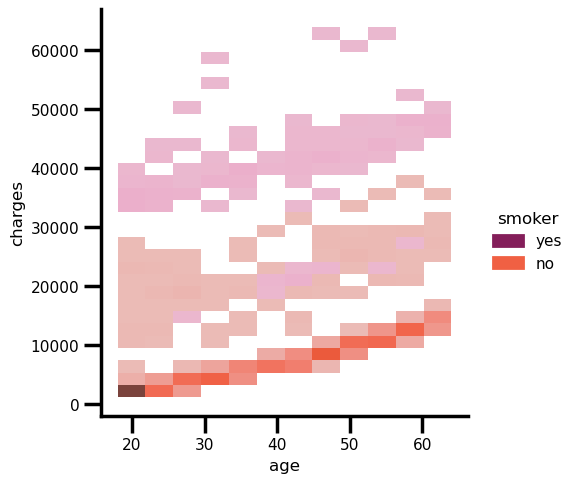

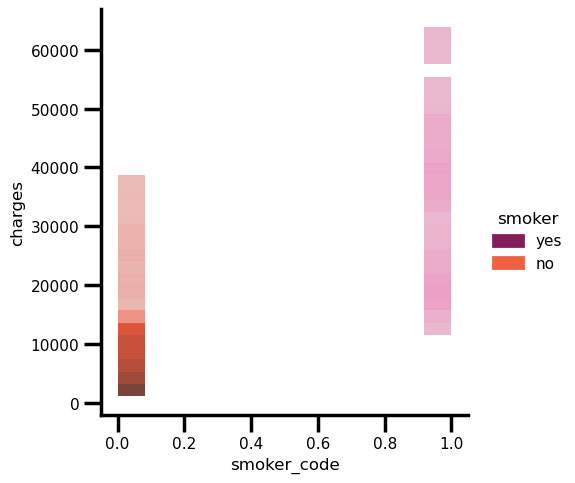

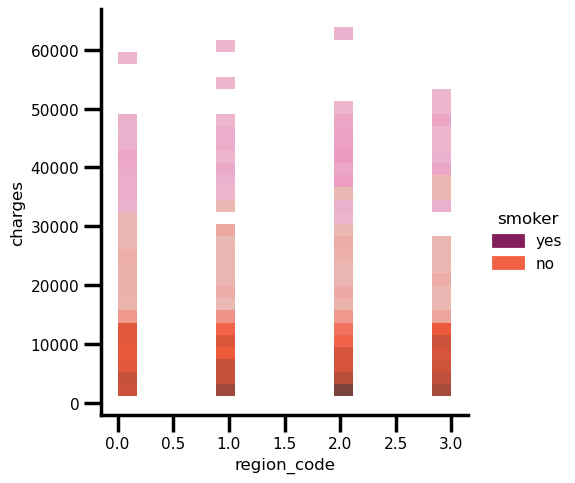

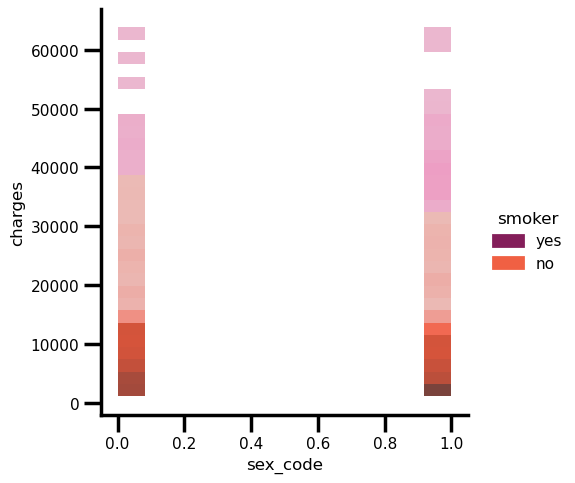

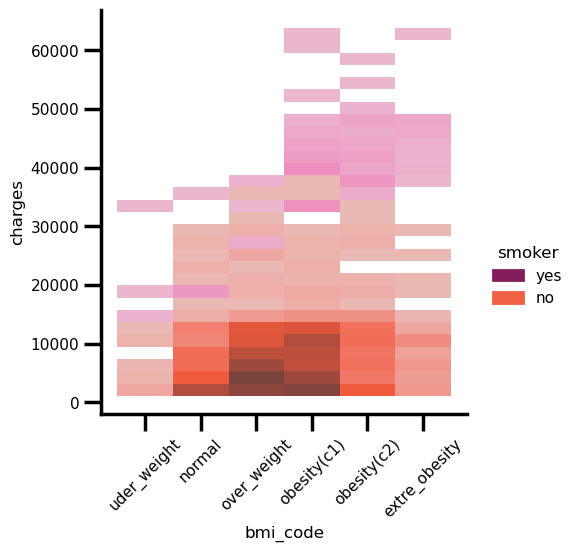

In [35]:
for col in insurance[['children', 'age', 'smoker_code', 'region_code', 'sex_code', 'bmi_code']]:
    results=sns.displot(x=col,y='charges',hue='smoker',data=insurance,palette='rocket')
    if col=='bmi_code':
        for ax in results.axes.flat:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
            plt.show()
    print(results)

## Inferences-


For all features (children, age, smoker_code, region_code, sex_code, bmi_code), there is a clear distinction between the charges incurred by smokers and non-smokers. Smokers tend to have significantly higher charges than non-smokers.
The plots for age and bmi_code show a roughly linear relationship between these variables and charges, with charges generally increasing with age and with higher BMI values.
The plots for children, smoker_code, region_code, and sex_code show less clear relationships with charges, but still demonstrate the importance of smoking status in determining charges. Smokers consistently have higher charges across all levels of these variables.

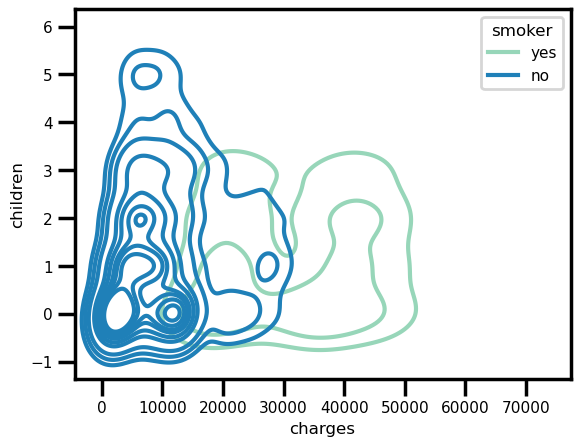

AxesSubplot(0.125,0.11;0.775x0.77)


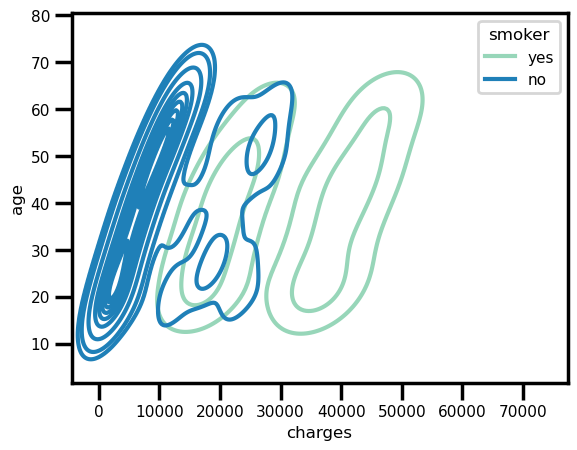

AxesSubplot(0.125,0.11;0.775x0.77)


In [36]:
for col in insurance[['children', 'age']]:
    results=sns.kdeplot(y=col,x='charges',hue='smoker',data=insurance,palette='YlGnBu')
    plt.show()
    print(results)

## Inferences-


For both 'children' and 'age', the KDE plots show that patients who smoke have higher charges compared to non-smokers.
The KDE plot for 'children' shows that patients with more children tend to have lower charges compared to those with fewer children.
The KDE plot for 'age' shows that charges tend to increase as patients get older, regardless of smoking status.
Overall, these KDE plots help visualize the relationship between charges and these two variables in the insurance dataset, highlighting the impact of smoking status and number of children on charges.

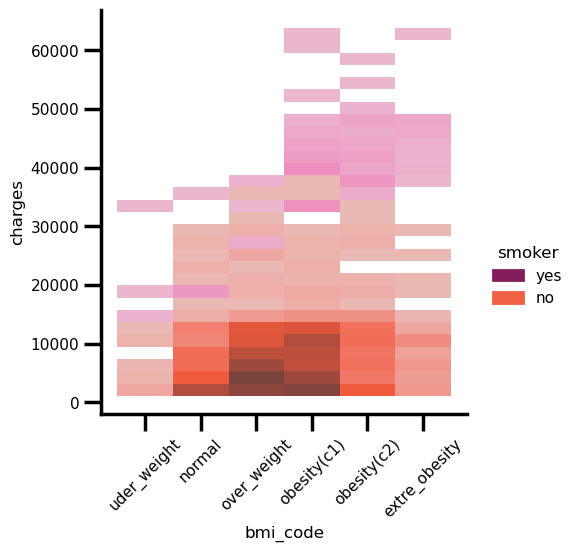

In [37]:
results=sns.displot(x='bmi_code',y='charges',hue='smoker',data=insurance,palette='rocket')
for ax in results.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## Inferences-


The plot shows that patients who smoke have higher charges compared to those who do not smoke, regardless of BMI code.
The plot also shows that patients with higher BMI codes tend to have higher charges, especially for those who smoke.
The plot provides a visual representation of the relationship between BMI code, charges, and smoker status in the insurance dataset.

In [38]:
insurance

,charges,sex,smoker,region,bmi,children,age,smoker_code,region_code,sex_code,bmi_code
0,16884.92400,female,yes,southwest,27.900,0,19,1,3,0,over_weight
1,1725.55230,male,no,southeast,33.770,1,18,0,2,1,obesity(c1)
2,4449.46200,male,no,southeast,33.000,3,28,0,2,1,obesity(c1)
3,21984.47061,male,no,northwest,22.705,0,33,0,1,1,normal
4,3866.85520,male,no,northwest,28.880,0,32,0,1,1,over_weight
...,...,...,...,...,...,...,...,...,...,...,...
1333,10600.54830,male,no,northwest,30.970,3,50,0,1,1,obesity(c1)
1334,2205.98080,female,no,northeast,31.920,0,18,0,0,0,obesity(c1)
1335,1629.83350,female,no,southeast,36.850,0,18,0,2,0,obesity(c2)
1336,2007.94500,female,no,southwest,25.800,0,21,0,3,0,over_weight


# conclusion-


Gender does not seem to have a significant impact on the charges of the patients in the dataset.
The majority of patients in the dataset do not smoke, but smokers tend to have significantly higher charges.
The distribution of patients across the different regions is roughly equal, with the southwest having slightly more patients.
Patients with higher BMI tend to have higher charges, especially for smokers.
Patients who have children tend to have slightly higher charges, but the impact of children on charges is not significant.
As age increases, charges tend to increase as well, especially for smokers.
The age of patients in the dataset ranges from 18 to 60, while the BMI ranges up to 35.
The different visualizations provided valuable insights into the relationships between the different variables in the dataset, and can help in further analysis and modeling.

In [39]:
pd.qcut(insurance['age'],5)

0       (17.999, 24.0]
1       (17.999, 24.0]
2         (24.0, 34.0]
3         (24.0, 34.0]
4         (24.0, 34.0]
             ...      
1333      (44.0, 54.0]
1334    (17.999, 24.0]
1335    (17.999, 24.0]
1336    (17.999, 24.0]
1337      (54.0, 64.0]
Name: age, Length: 1338, dtype: category
Categories (5, interval[float64, right]): [(17.999, 24.0] < (24.0, 34.0] < (34.0, 44.0] < (44.0, 54.0] < (54.0, 64.0]]

In [40]:
insurance['age'] = pd.qcut(insurance['age'],5,labels=[0,1,2,3,4])

In [41]:
insurance=pd.get_dummies(insurance,columns=['bmi_code'])

In [42]:
x=insurance.iloc[:,5:]
y = insurance['charges']
x

,children,age,smoker_code,region_code,sex_code,bmi_code_uder_weight,bmi_code_normal,bmi_code_over_weight,bmi_code_obesity(c1),bmi_code_obesity(c2),bmi_code_extre_obesity
0,0,0,1,3,0,0,0,1,0,0,0
1,1,0,0,2,1,0,0,0,1,0,0
2,3,1,0,2,1,0,0,0,1,0,0
3,0,1,0,1,1,0,1,0,0,0,0
4,0,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,3,3,0,1,1,0,0,0,1,0,0
1334,0,0,0,0,0,0,0,0,1,0,0
1335,0,0,0,2,0,0,0,0,0,1,0
1336,0,0,0,3,0,0,0,1,0,0,0


In [43]:
x.drop(['region_code','sex_code'],axis=1,inplace=True)

In [44]:
x

,children,age,smoker_code,bmi_code_uder_weight,bmi_code_normal,bmi_code_over_weight,bmi_code_obesity(c1),bmi_code_obesity(c2),bmi_code_extre_obesity
0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0
2,3,1,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,3,3,0,0,0,0,1,0,0
1334,0,0,0,0,0,0,1,0,0
1335,0,0,0,0,0,0,0,1,0
1336,0,0,0,0,0,1,0,0,0


# machine learning models

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

from sklearn.linear_model import LinearRegression
model_l = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model_kn = KNeighborsRegressor()
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
from sklearn.svm import SVR
model_sv = SVR()
from sklearn.linear_model import LogisticRegression
model_lr =LogisticRegression()
from sklearn.metrics import r2_score,mean_squared_error

model_l.fit(x_train,y_train)
pred_l= model_l.predict(x_test)
print('.\n','.\n','r2_score linear regression is ',r2_score(y_test,pred_l)*100)

print('.\n','.\n','mean_squared_error linear regression is ',mean_squared_error(y_test,pred_l))

model_kn.fit(x_train,y_train)
pred_kn = model_kn.predict(x_test)
print('.\n','.\n','r2_score k negighbors regression is ',r2_score(y_test,pred_kn)*100)

print('.\n','.\n','mean_squared_error k neighbors regression is ',mean_squared_error(y_test,pred_kn))

model_dt.fit(x_train,y_train)
pred_dt= model_dt.predict(x_test)
print('.\n','.\n','r2_score decision tree regression  is ',r2_score(y_test,pred_dt)*100)

print('.\n','.\n','mean_squared_error decision tree regression is ',mean_squared_error(y_test,pred_dt))

model_rf.fit(x_train,y_train)
pred_rf= model_rf.predict(x_test)
print('.\n','.\n','r2_score Random tree regression is ',r2_score(y_test,pred_rf)*100)

print('.\n','.\n','mean_squared_error Random tree regression is ',mean_squared_error(y_test,pred_rf))

model_sv.fit(x_train,y_train)
pred_sv= model_sv.predict(x_test)
print('.\n','.\n','r2_score SVR is ',r2_score(y_test,pred_sv)*100)

print('.\n','.\n','mean_squared_error SVR is ', mean_squared_error(y_test,pred_sv))

.
 .
 r2_score linear regression is  76.29925212273993
.
 .
 mean_squared_error linear regression is  32696437.577307865
.
 .
 r2_score k negighbors regression is  65.22491309737613
.
 .
 mean_squared_error k neighbors regression is  47974075.08174141
.
 .
 r2_score decision tree regression  is  81.82396771069862
.
 .
 mean_squared_error decision tree regression is  25074799.67416868
.
 .
 r2_score Random tree regression is  83.89532317139371
.
 .
 mean_squared_error Random tree regression is  22217255.056936868
.
 .
 r2_score SVR is  -7.877649600496572
.
 .
 mean_squared_error SVR is  148822933.96038994


In [46]:
import tensorflow as tf
from keras.models  import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential()
    

model_1.add(Dense(10, input_dim=9, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1, activation='linear'))

model_1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [47]:
model_1.fit(x, y, epochs=10, batch_size=7)

Epoch 1/10
192/192 [==============================] - 1s 1ms/step - loss: 13243.6797 - mean_absolute_error: 13243.6797
Epoch 2/10
192/192 [==============================] - 0s 1ms/step - loss: 12127.8447 - mean_absolute_error: 12127.8447
Epoch 3/10
192/192 [==============================] - 0s 1ms/step - loss: 7509.9761 - mean_absolute_error: 7509.9761
Epoch 4/10
192/192 [==============================] - 0s 1ms/step - loss: 6827.9307 - mean_absolute_error: 6827.9307
Epoch 5/10
192/192 [==============================] - 0s 1ms/step - loss: 6595.1631 - mean_absolute_error: 6595.1631
Epoch 6/10
192/192 [==============================] - 0s 1ms/step - loss: 6385.1392 - mean_absolute_error: 6385.1392
Epoch 7/10
192/192 [==============================] - 0s 1ms/step - loss: 6122.6748 - mean_absolute_error: 6122.6748
Epoch 8/10
192/192 [==============================] - 0s 1ms/step - loss: 5881.9385 - mean_absolute_error: 5881.9385
Epoch 9/10
192/192 [==============================] - 0s 1ms

# conclusion-



An R2 score of 83.82% for Random Tree Regression indicates that the model can explain about 83.82% of the variability in the dependent variable (charges) based on the independent variables (sex, smoker, region, bmi, children, and age). This is a good indication of the model's performance, as it shows that the independent variables are good predictors of the dependent variable. However, it's important to note that there may be other variables that could also impact the charges, and that the model's predictions may not be accurate for all cases.

# Thank you.....